In [ ]:
# 327. Рестораны 2.0 https://coderun.yandex.ru/problem/restaurants-2

In [1]:
!unzip restaurants\ \(1\).zip

Archive:  restaurants (1).zip
replace restaurants_train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
# Читаем данные
data = []
with open('restaurants_train.txt') as f:
    for _ in f.readlines():
        data.append(list(map(float, _.split())))

In [3]:
# Кладем их в датафрейм
import pandas as pd

df = pd.DataFrame(data)
df.columns = ['winner', 'rating1', 'rating2', 'distance1', 'distance2']

In [4]:
df

,winner,rating1,rating2,distance1,distance2
0,0.5,8.154642,-1.000000,0.000552,0.000483
1,1.0,-1.000000,9.105132,0.075709,0.024765
2,0.0,7.349630,-1.000000,0.045557,0.006901
3,0.0,7.077312,-1.000000,0.000369,0.004083
4,1.0,-1.000000,-1.000000,0.002481,0.002171
...,...,...,...,...,...
995,0.0,7.731112,-1.000000,0.009292,0.007016
996,0.0,8.194613,6.501558,0.005693,0.004549
997,1.0,3.090112,5.335786,0.002175,0.001366
998,1.0,9.143142,-1.000000,0.441040,0.172363


In [5]:
df.describe()

,winner,rating1,rating2,distance1,distance2
count,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,0.46900,4.297690,4.025088,0.049533,5.013072e-02
std,0.46718,4.515008,4.551024,0.143624,1.443761e-01
min,0.00000,-1.000000,-1.000000,0.000000,4.661730e-07
25%,0.00000,-1.000000,-1.000000,0.003998,4.080090e-03
50%,0.50000,6.636791,6.266058,0.008904,8.317535e-03
75%,1.00000,8.554018,8.452399,0.021556,2.085935e-02
max,1.00000,9.675350,9.775452,1.000000,1.000000e+00


(array([438.,   0.,   0.,   4.,  13.,  15.,  47., 112., 174., 197.]),
 array([-1.        ,  0.07754517,  1.15509035,  2.23263552,  3.3101807 ,
         4.38772587,  5.46527104,  6.54281622,  7.62036139,  8.69790657,
         9.77545174]),
 <BarContainer object of 10 artists>)

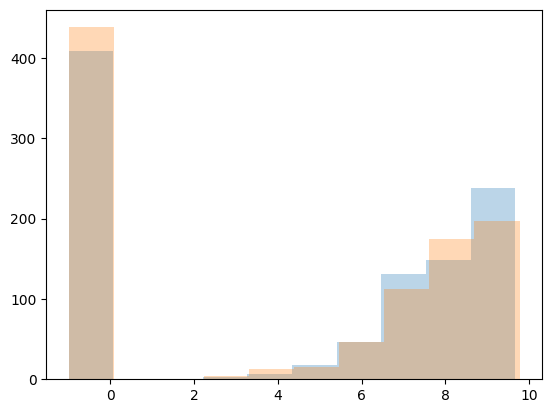

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['rating1'], alpha=0.3)
plt.hist(df['rating2'], alpha=0.3)

In [7]:
import numpy as np
mean_rating = np.mean(np.concat([df[df['rating1']!=-1]['rating1'], df[df['rating2']!=-1]['rating2']]))
mean_rating

np.float64(7.945214939947139)

In [8]:
import numpy as np
df['rating1'] = df['rating1'].replace(-1, mean_rating)
df['rating2'] = df['rating2'].replace(-1, mean_rating)

df['rating1_exp'] = np.exp(df['rating1'])
df['rating2_exp'] = np.exp(df['rating2'])

# df['rating1'] = df['rating1']**2
# df['rating2'] = df['rating2']**2

(array([903.,  33.,  19.,  10.,   8.,   5.,   8.,   2.,   0.,  12.]),
 array([4.66172992e-07, 1.00000420e-01, 2.00000373e-01, 3.00000326e-01,
        4.00000280e-01, 5.00000233e-01, 6.00000186e-01, 7.00000140e-01,
        8.00000093e-01, 9.00000047e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

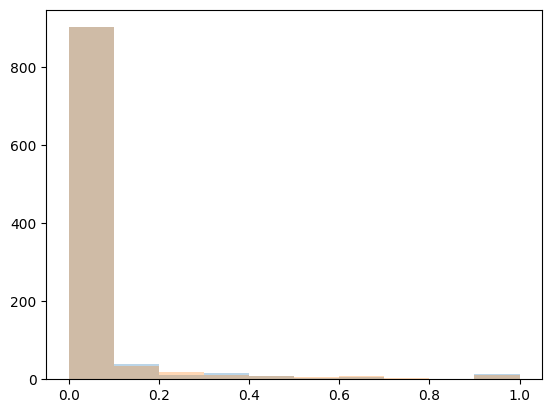

In [9]:
plt.hist(df['distance1'], alpha=0.3)
plt.hist(df['distance2'], alpha=0.3)

In [10]:
epsilon = 1e-5
df['distance1'] = np.log(df['distance1']+epsilon)
df['distance2'] = np.log(df['distance2']+epsilon)

In [11]:
df

,winner,rating1,rating2,distance1,distance2,rating1_exp,rating2_exp
0,0.5,8.154642,7.945215,-7.484887,-7.615463,3479.493263,2822.038965
1,1.0,7.945215,9.105132,-2.580728,-3.697909,2822.038965,9001.369343
2,0.0,7.349630,7.945215,-3.088572,-4.974688,1555.621332,2822.038965
3,0.0,7.077312,7.945215,-7.878341,-5.498440,1184.779503,2822.038965
4,1.0,7.945215,7.945215,-5.995127,-6.128187,2822.038965,2822.038965
...,...,...,...,...,...,...,...
995,0.0,7.731112,7.945215,-4.677490,-4.958192,2278.133588,2822.038965
996,0.0,8.194613,6.501558,-5.166784,-5.390596,3621.389699,666.178750
997,1.0,3.090112,5.335786,-6.126054,-6.588401,21.979541,207.635826
998,1.0,9.143142,7.945215,-0.818597,-1.758092,9350.099089,2822.038965


In [12]:
# rating_std = np.std(df[['rating1', 'rating2']].values)
rating_exp_std = np.std(df[['rating1_exp', 'rating2_exp']].values)
distance_std = np.std(df[['distance1', 'distance2']].values)

# rating_mean = np.mean(df[['rating1', 'rating2']].values)
rating_exp_mean = np.mean(df[['rating1_exp', 'rating2_exp']].values)
distance_mean = np.mean(df[['distance1', 'distance2']].values)

In [13]:
# print('rating_std =', rating_std)
print('rating_exp_std =', rating_exp_std)
print('distance_std =', distance_std)
# print('rating_mean =', rating_mean)
print('rating_exp_mean =', rating_exp_mean)
print('distance_mean =', distance_mean)

rating_exp_std = 3384.091413920937
distance_std = 1.583048315334561
rating_exp_mean = 4087.8388613559196
distance_mean = -4.569731300663472


In [14]:
df['rating1_exp'] = (df['rating1_exp'] - rating_exp_mean) / rating_exp_std
df['rating2_exp'] = (df['rating2_exp'] - rating_exp_mean) / rating_exp_std

# df['rating1'] = (df['rating1'] - rating_mean) / rating_std
# df['rating2'] = (df['rating2'] - rating_mean) / rating_std

df['distance1'] = (df['distance1'] - distance_mean) / distance_std
df['distance2'] = (df['distance2'] - distance_mean) / distance_std
df

,winner,rating1,rating2,distance1,distance2,rating1_exp,rating2_exp
0,0.5,8.154642,7.945215,-1.841483,-1.923966,-0.179766,-0.374044
1,1.0,7.945215,9.105132,1.256439,0.550724,-0.374044,1.451950
2,0.0,7.349630,7.945215,0.935637,-0.255808,-0.748271,-0.374044
3,0.0,7.077312,7.945215,-2.090024,-0.586658,-0.857855,-0.374044
4,1.0,7.945215,7.945215,-0.900412,-0.984465,-0.374044,-0.374044
...,...,...,...,...,...,...,...
995,0.0,7.731112,7.945215,-0.068070,-0.245388,-0.534768,-0.374044
996,0.0,8.194613,6.501558,-0.377154,-0.518534,-0.137836,-1.011102
997,1.0,3.090112,5.335786,-0.983117,-1.275179,-1.201463,-1.146601
998,1.0,9.143142,7.945215,2.369564,1.776092,1.554999,-0.374044


In [15]:
# df['winner_rating'] = (1-df['winner']) * df['rating1'] + df['winner'] * df['rating2']
# df['loser_rating'] = df['winner'] * df['rating1'] + (1-df['winner']) * df['rating2']

# df['winner_distance'] = (1-df['winner']) * df['distance1'] + df['winner'] * df['distance2']
# df['loser_distance'] = df['winner'] * df['distance1'] + (1-df['winner']) * df['distance2']
# df

In [16]:
df.drop(df[df['winner']==0.5].index, inplace=True)

In [17]:
def loss(weights):
    weights = np.array(weights)
    df['score1'] = df[['rating1_exp', 'distance1']] @ weights
    df['score2'] = df[['rating2_exp', 'distance2']] @ weights
    df['s_diff'] = df['score1'] - df['score2']
    return pd.concat((
        np.log(1 + np.exp(df[df['winner'] == 0]['score2'] - df[df['winner'] == 0]['score1'])),
        np.log(1 + np.exp(df[df['winner'] == 1]['score1'] - df[df['winner'] == 1]['score2']))
    )).mean()

from scipy.optimize import minimize

res = minimize(loss,[1,1])
res.x

array([ 0.72280234, -1.94521681])

In [18]:
print('mean_rating =', mean_rating)
print('epsilon =', epsilon)

# print('rating_std =', rating_std)
print('rating_exp_std =', rating_exp_std)
print('distance_std =', distance_std)
# print('rating_mean =', rating_mean)
print('rating_exp_mean =', rating_exp_mean)
print('distance_mean =', distance_mean)

print('r_w =', res.x[0])
print('d_w =', res.x[1])

mean_rating = 7.945214939947139
epsilon = 1e-05
rating_exp_std = 3384.091413920937
distance_std = 1.583048315334561
rating_exp_mean = 4087.8388613559196
distance_mean = -4.569731300663472
r_w = 0.7228023405594355
d_w = -1.9452168078334766


In [20]:
pd.concat((
        np.log(1 + np.exp(df[df['winner'] == 0]['score2'] - df[df['winner'] == 0]['score1'])),
        np.log(1 + np.exp(df[df['winner'] == 1]['score1'] - df[df['winner'] == 1]['score2']))
    )).mean()

np.float64(0.5589392807919884)

Делала опираясь на решение другого участника, если бы не он, не разобралась бы.

Если мы посмотрим на распределение данных, то обнаружим, что ни рейтинги, ни расстояния не распределены нормально. Мы можем это исправить, логарифмировав расстояния и применив math.exp(рейтинг), предварительно заменив -1 на среднее значение рейтинга -- ~8. После этих преобразований мы вычисляем среднее и стандартное отклонение для обоих параметров -- это нам понадобится для нормализации.

Находим веса минимизируя функцию из задания.

Чтобы вычислить скор при тестировании, мы должны прежде всего применить к новым значениям параметров те же трансформации: заменить -1 на среднее значение для рейтинга и нормализовать.

In [ ]:
import sys
import math


def main():
    """
    Пример ввода и вывода числа n, где -10^9 < n < 10^9:
    n = int(input())
    print(n)
    """

    mean_rating = 7.945214939947139
    epsilon = 1e-05
    rating_exp_std = 3384.091413920937
    distance_std = 1.583048315334561
    rating_exp_mean = 4087.8388613559196
    distance_mean = -4.569731300663472
    r_w = 0.7228023405594355
    d_w = -1.9452168078334766

    n = int(input())
    for _ in range(n):
        r, d = map(float, input().split())

        if r == -1:
            r = mean_rating

        r = (math.exp(r) - rating_exp_mean) / rating_exp_std
        d = (math.log(d+epsilon) - distance_mean) / distance_std

        score = r*r_w + d*d_w
        print(score)


if __name__ == '__main__':
    main()
